Setting Dependencies and Importing Necessary Libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense


Loading the Data

In [2]:
(X_train, y_train), (X_test, y_test) =  mnist.load_data()


Visualizing the Data

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Label of this specific image is: 5


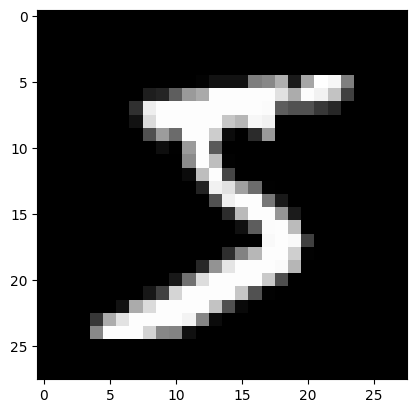

In [19]:
plt.imshow(X_train[0], cmap="gray")
print(f"Label of this specific image is: {y_train[0]}")

Preprocessing the Training Data

In [20]:
image_width, image_height = 28, 28
X_train = X_train.reshape(60000, image_height * image_width)
X_test = X_test.reshape(10000, image_height * image_width)
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [21]:
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

In [22]:
X_train /= 255.0
X_test /= 255.0

Preprocessing the Labels Data

In [23]:
y_train= to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

Buiding and Configuring the Model

In [24]:
# Instantiating a Model
model = Sequential()

In [25]:
# Configuring the Model
# Dense determines the strucutre of a specific layer in the NN
model.add(Dense(512, activation='relu', input_shape=(784, )))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

Compiling the Model

In [26]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Training the Model

In [28]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1833 - accuracy: 0.9446 - val_loss: 0.0963 - val_accuracy: 0.9706
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0813 - accuracy: 0.9743 - val_loss: 0.0886 - val_accuracy: 0.9737
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0934 - val_accuracy: 0.9714
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.1017 - val_accuracy: 0.9722
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0874 - val_accuracy: 0.9762
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0892 - val_accuracy: 0.9785
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.1024 - val_ac

Evaluating the Model

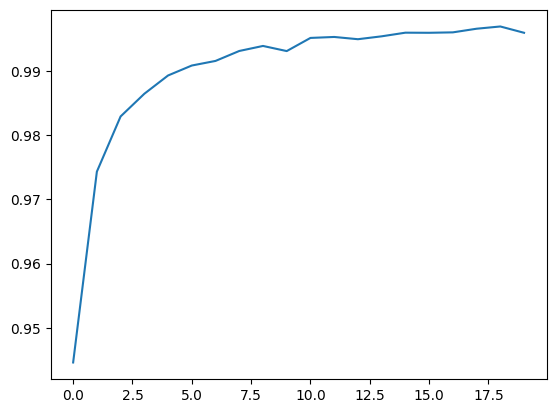

In [33]:
plt.plot(history.history['accuracy'])

In [36]:
history.history['accuracy']

[0.944599986076355,
 0.9743333458900452,
 0.9829333424568176,
 0.986466646194458,
 0.9893166422843933,
 0.9908666610717773,
 0.9915833473205566,
 0.9931333065032959,
 0.9939166903495789,
 0.9931166768074036,
 0.9951666593551636,
 0.9953166842460632,
 0.9949666857719421,
 0.9954166412353516,
 0.995983362197876,
 0.9959666728973389,
 0.9960333108901978,
 0.9965999722480774,
 0.9969499707221985,
 0.9959666728973389]

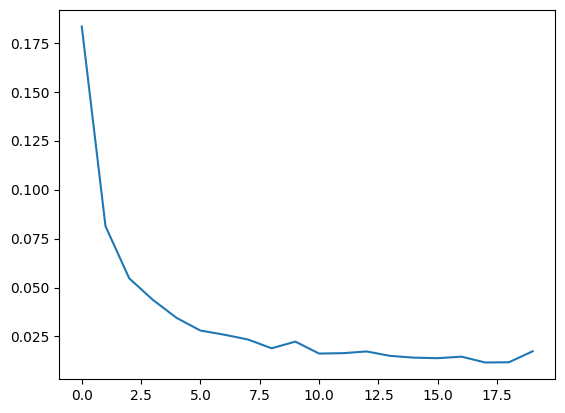

In [38]:
plt.plot(history.history["loss"])

Testing the Accuracy of the Model in the Testing Data

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1212 - accuracy: 0.9826


[0.1211652085185051, 0.9825999736785889]